# Project: Investigate No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project aims at investigating the data of patients attendance to medical their appointments in Brazil. The data is looked at, wrangled and cleaned in order to be easier to explore. Afterwards, the effect on each of the variables on the patients' attendance is investigated and visualized through out the exploratory data analysis section. Finally, conclusions will be drawn on what factors can be used to predict if a patient will show up for their scheduled appointment.

This analysis will try to answer the questions below:
* Is there are difference between males' and females' commitment to attend their schedueled medical appointments?
* which of the variables (Scholarship, Hipertension, Diabetes, Alcoholism, Handicap, or receiving sms) can be used as indicators to predict the patient's attendance to their medical appointments?
* Does Age has an effect on the appointment attendance rate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df=pd.read_csv('noshowappointments.csv')

df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.loc[df['Age']== -1.000000]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
df.loc[df['Handcap']== 4.000000]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
91820,9.251878e+12,5789549,M,2016-06-08T15:14:00Z,2016-06-08T00:00:00Z,15,DA PENHA,0,0,0,0,4,0,No
98538,4.972463e+14,5760621,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19,SÃO PEDRO,0,0,0,0,4,0,No
104268,7.581895e+14,5697136,F,2016-05-13T15:01:17Z,2016-06-02T00:00:00Z,9,ITARARÉ,0,0,0,0,4,1,Yes


In [8]:
df['Hipertension'].sum()

21801

### Data wrangling main findings

After wrangling the data, the following problems were found:

* Minimum Age is -1 which does not make since. When looked for this value, 1 patient was found with this age value. This patient's entry should be dropped.
* The value of Handicap of 3 entries was found to be 4. This needs to be changed to 1.
* The data has no null values and no dublicated rows.
* AppointmentDay and ScheduledDay are in string formats


### Data Cleaning 
In order to clean the data to be easier to explore in the following stage, the following actions will be performed:
* The patient's entry with age value of -1 will be dropped.
* The entries with Handcap values of 4 will be change to vales of 1.
* The PatientId and AppointmentID columns will be removed as they will not be necessary for this analysis.
* AppointmentDay and ScheduledDay will be changed to datetime formats so they can be easily dealt with

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.drop(['PatientId', 'AppointmentID'],axis=1, inplace=True)
df.rename(columns={'No-show':'NoShow'}, inplace=True)

In [10]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.drop([df.index[99832]], inplace=True)

In [12]:
df.loc[df['Age']== -1.000000]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow


In [13]:
df.at[91820,'Handcap']= 1
df.at[98538,'Handcap']= 1
df.at[104268,'Handcap']= 1


In [14]:
df.at[91820,'Handcap']

1

In [15]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  NoShow          110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 15.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

In order to determine what factors can be used to predict if a patient will show up for their scheduled appointment, the following relationships will be investigated.

* The difference between the show-rate of between genders
* How having Bolsa Familia affects the show-rate of patients
* How hipertension affects the show-rate of patients
* How Diabetes affects the show-rate of patients
* How Alcoholism affects the show-rate of patients
* How being a handcap affects the show-rate of patients
* Whether receiving a SMS before the appointment affects the show-rate of patients
* whether age affects patient's the show-rate





### Understanding the data with histograms
Before digging deeper into exploring, it is always a good idea to draw histograms of the variables presented in the data to get a better understanding of the data we are dealing with.

The following points can be understood about the data from the histogram graphs below:
* The ages of the patients are slightly right skewed, which means that the population has more younger patients than older patients
* The majority of patients do not have Bolsa Brazilia Coverage
* The majority of patients do not suffer from Hipertension, Diabetes, or Alcoholism
* The majority of patients are not handicped
* Only one-third of the population received SMS with their appointments

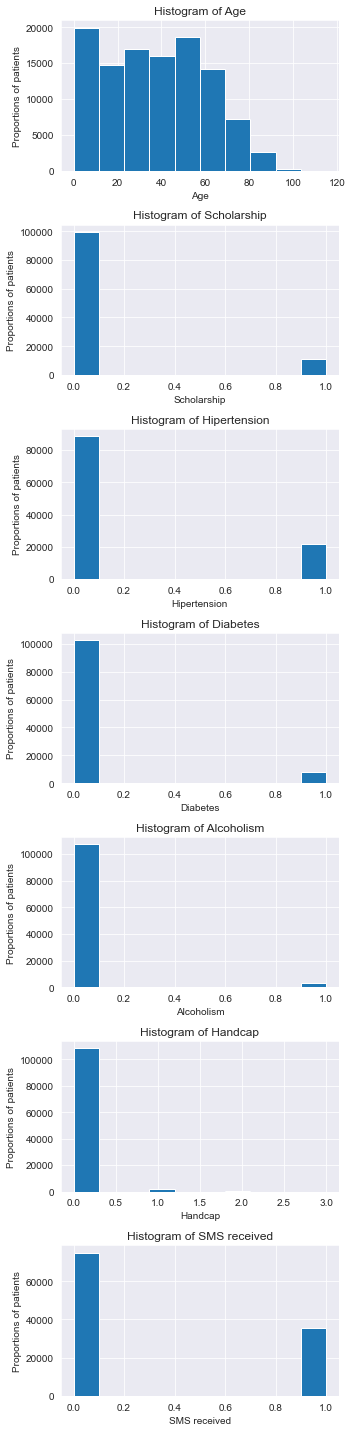

In [17]:
fig, axes = plt.subplots(7,1, figsize=(5,20), sharex=False, sharey=False)

variables={0:df['Age'], 1:df['Scholarship'], 2:df['Hipertension'], 3:df['Diabetes'], 4:df['Alcoholism'], 5:df['Handcap'], 6:df['SMS_received']}
labels={0:'Age', 1:'Scholarship', 2:'Hipertension', 3:'Diabetes', 4:'Alcoholism', 5:'Handcap', 6:'SMS received'}

for i, ax in enumerate(axes.ravel()):
    ax.hist(variables[i])
    ax.set_ylabel('Proportions of patients')
    ax.set_xlabel(str(labels[i]))
    ax.set_title('Histogram of ' + str(labels[i]));

plt.tight_layout()
plt.show()

### Is there are difference between males' and females' commitment to attend their schedueled medical appointments?

#### The difference between the show-rate of between genders

The data will be grouped by gender and then by the value counts of show and no show. Afterwards, the proportions of the show and no show rate of both genders is calculated. 

Since the proportion will be used all over this study, we will define a function which will calculate it automatically through out the study.

In [18]:
def prop_values(x):
    return x/x.sum()

In [19]:
gender_show=df.groupby(['Gender'])['NoShow'].value_counts()

A graph comparing the proportions of males and females attending their medical appointments is created. The graph shows no different between the show rates of males and females.

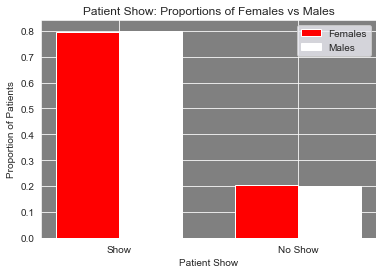

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
width=0.35
ind=np.arange(2)
red_bars = plt.bar(ind, prop_values(gender_show['F']), width, color='r', label='Females')
white_bars = plt.bar(ind+width, prop_values(gender_show['M']), width, color='w', label='Males')
plt.ylabel('Proportion of Patients')
plt.xlabel('Patient Show')
plt.title('Patient Show: Proportions of Females vs Males')
locations = ind + width / 2  
labels = ['Show', 'No Show']  
plt.xticks(locations, labels)
ax.patch.set_facecolor('grey')
plt.legend();

### Which of the variables (Scholarship, Hipertension, Diabetes, Alcoholism, Handicap, or receiving sms) can be used as indicators to predict the patient's attendance to their medical appointments?

The next step is to explore the relationship between the following variables and the show rate:
* Scholarship
* Hipertension
* Diabetes
* Alcoholism
* Being Handcap
* Receiving SMS


In order to be able to compare each variable separately, it is important to extract a control group from the data set (which is reffered to below as **Comparison Group**). In this study, the comparison group consists of patients who are not included in any of the above variables (have 0 as values in all variables).

The same is done to the data of all of the variables. The data of each variable will be isolated by showing patients who on hve this variable as true (1) and all the other variables as fales (0). This will allow the comparison between the varaibles and the comparison group to be as accurate as possible.


The data will be grouped by NoShow using the .count() function to show the count of patients who have showed and have not showed to their medical appointments. Afterwards, the proportions will be calculated to make the data comparable between different variables.

The for-loop below is created to do the above-stated funcationality while keeping the code efficient

In [21]:
comparison_group=df.query('Scholarship == 0 and Hipertension == 0 and Diabetes == 0 and Alcoholism == 0 and Handcap == 0 and SMS_received == 0').drop(['Age', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1)
que={0:'Scholarship == 0 and Hipertension == 0 and Diabetes == 0 and Alcoholism == 0 and Handcap == 0 and SMS_received == 0',
    1:'Scholarship == 1 and Hipertension == 0 and Diabetes == 0 and Alcoholism == 0 and Handcap == 0 and SMS_received == 0',
    2:'Scholarship == 0 and Hipertension == 1 and Diabetes == 0 and Alcoholism == 0 and Handcap == 0 and SMS_received == 0',
    3:'Scholarship == 0 and Hipertension == 0 and Diabetes == 1 and Alcoholism == 0 and Handcap == 0 and SMS_received == 0',
    4:'Scholarship == 0 and Hipertension == 0 and Diabetes == 0 and Alcoholism == 1 and Handcap == 0 and SMS_received == 0',
    5:'Scholarship == 0 and Hipertension == 0 and Diabetes == 0 and Alcoholism == 0 and Handcap == 1 and SMS_received == 0',
    6:'Scholarship == 0 and Hipertension == 0 and Diabetes == 0 and Alcoholism == 0 and Handcap == 0 and SMS_received == 1'}
prop=['comparison_group_show_prop', 'scholar_only_show_prop', 'hiper_only_show_prop', 'diab_only_show_prop', 'alc_only_show_prop', 'hand_only_show_prop', 'sms_only_show_prop']

for i in que:
    df_var=df.query(que[i]).drop(['Age', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1).groupby(['NoShow']).count()
    globals()[prop[i]]=prop_values(df_var)
    i+=1

The results are the data presented in the following tables showing the proportions of the show and no show amoung the comparison group as well as the isolated groups of each variable

##### Proportion of attendance in the comparison group

In [22]:
comparison_group_show_prop

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
NoShow,,,,,,
No,0.83062,0.83062,0.83062,0.83062,0.83062,0.83062
Yes,0.16938,0.16938,0.16938,0.16938,0.16938,0.16938


##### Proportion of attendance in isolated group of patients with Bolsa Familia

In [23]:
scholar_only_show_prop

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
NoShow,,,,,,
No,0.807535,0.807535,0.807535,0.807535,0.807535,0.807535
Yes,0.192465,0.192465,0.192465,0.192465,0.192465,0.192465


##### Proportion of attendance in isolated group of patients with Hipertension

In [24]:
hiper_only_show_prop

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
NoShow,,,,,,
No,0.857866,0.857866,0.857866,0.857866,0.857866,0.857866
Yes,0.142134,0.142134,0.142134,0.142134,0.142134,0.142134


##### Proportion of attendance in isolated group of patients with Diabetes

In [25]:
diab_only_show_prop

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
NoShow,,,,,,
No,0.828671,0.828671,0.828671,0.828671,0.828671,0.828671
Yes,0.171329,0.171329,0.171329,0.171329,0.171329,0.171329


##### Proportion of attendance in isolated group of patients with Alcoholism

In [26]:
alc_only_show_prop

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
NoShow,,,,,,
No,0.855402,0.855402,0.855402,0.855402,0.855402,0.855402
Yes,0.144598,0.144598,0.144598,0.144598,0.144598,0.144598


##### Proportion of attendance in isolated group of Hanidcaped patients 

In [27]:
hand_only_show_prop

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
NoShow,,,,,,
No,0.821149,0.821149,0.821149,0.821149,0.821149,0.821149
Yes,0.178851,0.178851,0.178851,0.178851,0.178851,0.178851


##### Proportion of attendance in isolated group of patients who received SMS

In [28]:
sms_only_show_prop

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
NoShow,,,,,,
No,0.719473,0.719473,0.719473,0.719473,0.719473,0.719473
Yes,0.280527,0.280527,0.280527,0.280527,0.280527,0.280527


### Comparison of Comparison group data and the data presented in the isolated groups of the variables

In order to be able to compare the data presented in the tables above, it needs to be put in graphs. The below graphs are created using a for-loop to preseve code efficiency. The graphs compares the comparison group to the isolated groups representing each of the variables. below are the interpretation of the findings in these graphs.

##### Comparison group vs Bolsa Familia
The graph below shows that patients with Bolsa Familia tend to be less committed to their medical appointment compared to those who do not have Bolsa Familia.
##### Comparison group vs Hipertension
The graph below shows that patients with hipertension tend to be more committed to their medical appointment compared to those who do not have hipertension.
##### Comparison group vs Diabetes
The graph below shows no difference in commitment to medical appointments between patients with diabetes and those who do not have diabetes.
##### Comparison group vs Alcoholism
The graph below shows that patients suffering from alcoholism tend to be more committed to their medical appointment compared to those who do not suffer from alcoholism.
##### Comparison group vs Handicaped
The graph below shows that handicaped patients tend to be slightly less committed to their medical appointment compared to those who are not handicaped.
##### Comparison group vs SMS Received
The graph below shows that patients who received SMS for their appointments tend to be less committed to their medical appointment compared to those who did not receive SMS.

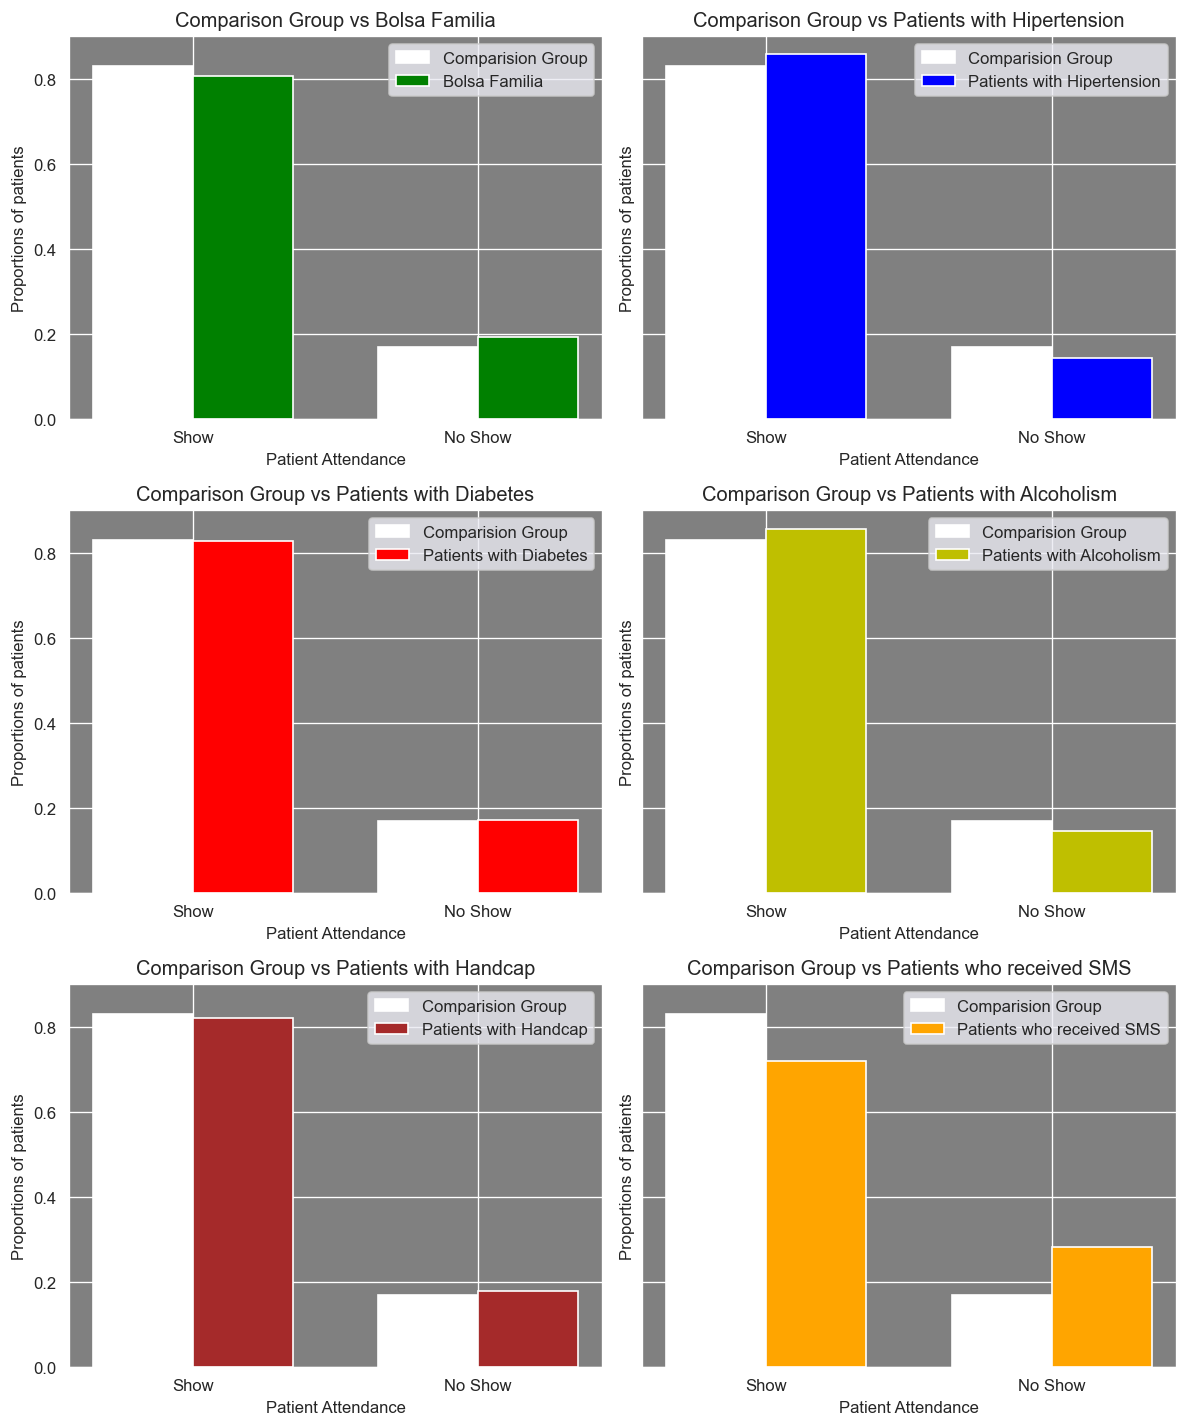

In [29]:
fig, axes = plt.subplots(3,2, figsize=(10,12), sharex=False, sharey=True, dpi=120)
colors = {0:'g', 1:'b', 2:'r', 3:'y', 4:'brown', 5:'orange'}
width=0.35
ind=np.arange(2)
locations = ind + width / 2 
variables={0:scholar_only_show_prop['Scholarship'], 1:hiper_only_show_prop['Hipertension'], 2:diab_only_show_prop['Diabetes'], 3:alc_only_show_prop['Alcoholism'], 4:hand_only_show_prop['Handcap'], 5:sms_only_show_prop['SMS_received']}
labels={0:'Bolsa Familia', 1:'Patients with Hipertension', 2:'Patients with Diabetes', 3:'Patients with Alcoholism', 4:'Patients with Handcap', 5:'Patients who received SMS'}

for i, ax in enumerate(axes.ravel()):
    ax.bar(ind, comparison_group_show_prop['SMS_received'], width, color='w', label='Comparision Group')
    ax.bar(ind+width, variables[i], width, color=colors[i], label=labels[i])
    ax.set_ylabel('Proportions of patients')
    ax.set_xlabel('Patient Attendance')
    ax.set_title('Comparison Group vs ' + str(labels[i]))
    ax.yaxis.set_ticks_position('none')
    label_x = ['Show', 'No Show']  
    ax.set_xticks(locations, label_x)
    ax.set_facecolor('grey')
    ax.legend();

    
plt.tight_layout()
plt.show()

##### Comparison group vs All Variables (combined)
The graph below shows a combined presentation for the graphs above. It shows the following:

The following variables can determine that the patient is less likely to attend their medical appointments:
* Having Bolsa Familia
* Being Handicaped
* Receiving SMS

The following variables can determine that the patient is more likely to attend their medical appointments:
* Having Hipertension
* Having Alcoholism

The following variable is not a determinent if a patient is more likely to attend their medical appointments:
* Having Diabetes


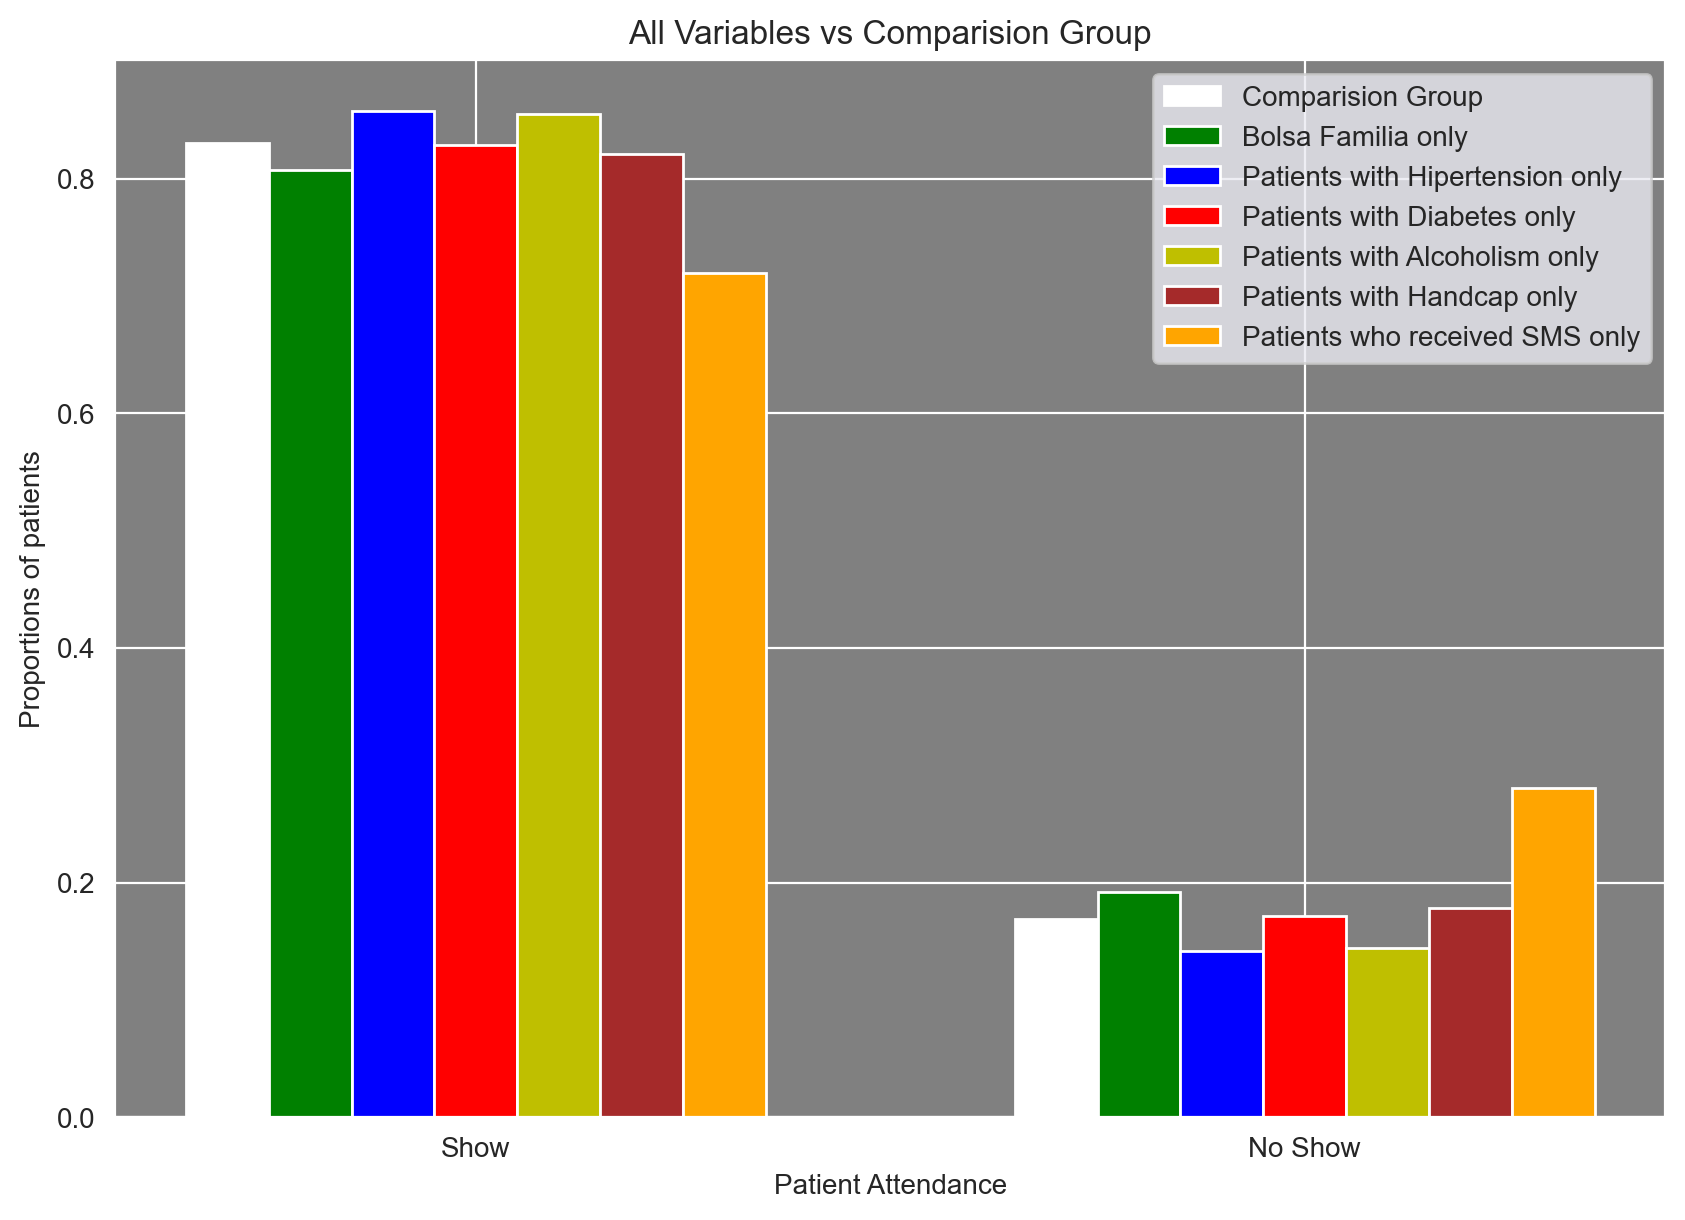

In [30]:
fig = plt.figure(figsize=(10,7), dpi=200)
ax = fig.add_subplot(111)
width=0.1
ind=np.arange(2)
red_bars = plt.bar(ind, comparison_group_show_prop['SMS_received'], width, color='w', label='Comparision Group')
white_bars = plt.bar(ind+width, scholar_only_show_prop['Scholarship'], width, color='g', label='Bolsa Familia only')
green_bars = plt.bar(ind+width*2, hiper_only_show_prop['Hipertension'], width, color='b', label='Patients with Hipertension only')
orange_bars = plt.bar(ind+width*3, diab_only_show_prop['Diabetes'], width, color='r', label='Patients with Diabetes only')
yellow_bars = plt.bar(ind+width*4, alc_only_show_prop['Alcoholism'], width, color='y', label='Patients with Alcoholism only')
black_bars = plt.bar(ind+width*5, hand_only_show_prop['Handcap'], width, color='brown', label='Patients with Handcap only')
brown_bars = plt.bar(ind+width*6, sms_only_show_prop['SMS_received'], width, color='orange', label='Patients who received SMS only')
plt.ylabel('Proportions of patients')
plt.xlabel('Patient Attendance')
plt.title('All Variables vs Comparision Group')
locations = ind + width*3
labels = ['Show', 'No Show']  
plt.xticks(locations, labels)

ax.patch.set_facecolor('grey')
plt.legend();



### Does Age has an effect on the appointment attendance rate?

To be able to investigate the effect of age on the medical appointments attendance rate, the data set needs to be categorized in to different brackets based on age and the age groups will be added to the data frame in a columns names age_group. The age brackets that will be used in this study are as follows:
* Children: 0-14 years old
* Youth: 15-24 years old
* Adults: 25-64 years old
* seniors: 65 years old and above

Afterwards, two dataframes will be created, the first from people who showed to their appointments and the second for those who did not. Each data frame will be grouped by the aged group using the .count() function. The proportions of show and no show values of each age group is then calculated to make the variables more comparable.

In [31]:
bin_edges = [ 0, 14, 24, 64, 115]
bin_names= ['Children','Youth', 'Adults', 'Seniors']
df['age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names)
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adults
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adults
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adults
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Children
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adults


In [32]:
df_show=df.query('NoShow == "No"')
df_noshow=df.query('NoShow == "Yes"')

In [33]:
df_all=df.groupby(['age_group'])['NoShow'].count()
df_show_count=df_show.groupby(['age_group'])['NoShow'].count()
df_noshow_count=df_noshow.groupby(['age_group'])['NoShow'].count()

In [34]:
df_show_count_prop=df_show_count/df_all
df_noshow_count_prop=df_noshow_count/df_all

##### Attendance rate for each age group
The graphs below shows that attendance levels differs from age group to another. The following points highlight the main finding that can be interpretted from this graph.

* Youth tend to have the lowest attendance-rate to their medical appointments.
* Children have higher tendency to show up to their medical appointments.
* Adults have higher tendency than children to show up to their medical appointments.
* Seniors have the highest tendency to show up to their medical appointments.


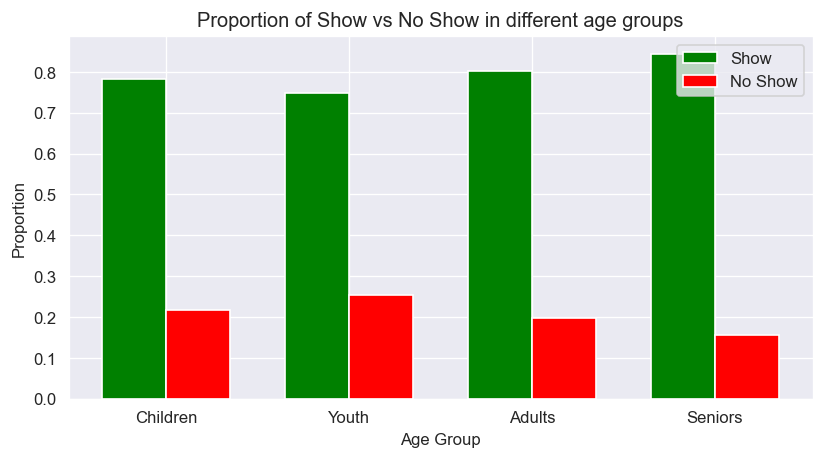

In [35]:
fig = plt.figure(figsize=(8,4), dpi=120)
width=0.35
ind=np.arange(4)
green_bars = plt.bar(ind, df_show_count_prop, width, color='green', label='Show')
red_bars = plt.bar(ind+width, df_noshow_count_prop, width, color='red', label='No Show')

plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.title('Proportion of Show vs No Show in different age groups')
locations = ind + width / 2  
labels = ['Children','Youth', 'Adults', 'Seniors']
plt.xticks(locations, labels)

plt.legend();



The below graph shows an even better visualization to change in attendance levels from one age group to the other and confirms the above-stated findings.



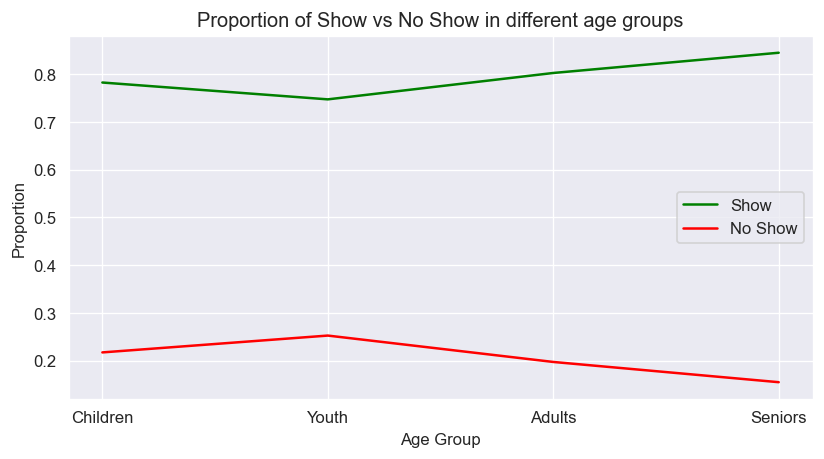

In [36]:
ind=np.arange(4)
fig = plt.figure(figsize=(8,4), dpi=120)
green_line = plt.plot(ind, df_show_count_prop, color='green', label='Show')
red_line = plt.plot(ind, df_noshow_count_prop, color='red', label='No Show')

plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.title('Proportion of Show vs No Show in different age groups')
locations = ind
labels = ['Children','Youth', 'Adults', 'Seniors']
plt.xticks(locations, labels)
plt.legend();

<a id='conclusions'></a>
## Conclusions
Exloring the patient attendance data set has interesting findings regarding the variables that can be used to predict the attendance of the patients to their medical appointments. First, amoung the variables that were presented in the data set, hipertension and alcoholism are indicators that patients have higher tendency to attend their medical appointments, while scholarship (Bolsa Familia), handicap, and receiving sms are indicators that patients will less likely attend their medical appointments. Diabetes on the other hand was found not to have an effect on the attendance rate.

These findings are interesting and the reasons behind them needs to be explored more deeply. For example, receiving sms was expected to be something that would encorage patients to attend their medical appointments but it came out to be the total opposite. The message sent within the sms needs to be investigated to know the reasons behind this outcome. 

On the other hand, age was found to have an impact on the attendance rate of the patients. The more valnerable the age group is to diseases, the more likely patients within this age group tend to show up to their medical appointments. For this reason, it was found that youth are the least likely to attend their medical appointments while seniors are the most likely to attend theirs.